In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    'e:/Study/GraduationProject/Covid/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    'e:/Study/GraduationProject/Covid/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy',Recall()])

model.fit(train_data,
          validation_data=test_data,
          epochs=10)

loss, acc,recall = model.evaluate(test_data)
print(f"Test Accuracy: {acc * 100:.2f}%")

model.save("covid_model.h5")


Found 13989 images belonging to 2 classes.
Found 46 images belonging to 2 classes.
Epoch 1/10


c:\Users\eng-fadi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


438/438 ━━━━━━━━━━━━━━━━━━━━ 236s 532ms/step - accuracy: 0.7447 - loss: 0.5260 - recall: 0.9587 - val_accuracy: 0.4783 - val_loss: 1.2589 - val_recall: 1.0000
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 194s 439ms/step - accuracy: 0.8008 - loss: 0.4211 - recall: 0.9268 - val_accuracy: 0.5870 - val_loss: 0.7734 - val_recall: 1.0000
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 189s 425ms/step - accuracy: 0.8257 - loss: 0.3859 - recall: 0.9244 - val_accuracy: 0.5652 - val_loss: 0.7917 - val_recall: 1.0000
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 216s 489ms/step - accuracy: 0.8426 - loss: 0.3545 - recall: 0.9321 - val_accuracy: 0.5217 - val_loss: 0.7088 - val_recall: 1.0000
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 215s 486ms/step - accuracy: 0.8556 - loss: 0.3289 - recall: 0.9340 - val_accuracy: 0.7391 - val_loss: 0.4137 - val_recall: 1.0000
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 432s 974ms/step - accuracy: 0.8654 - loss: 0.3100 - recall: 0.9381 - val_accuracy: 0.8478 - val_loss: 0.4210 - val_recall

ValueError: too many values to unpack (expected 2)

In [5]:
model.save("covid_model.h5")

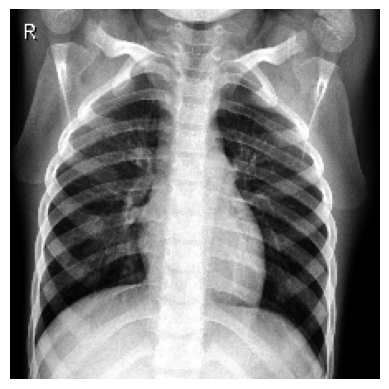

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
🟢 تم التنبؤ: Normal (0.01)


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img_path = "e:/Study/GraduationProject/Covid/test/Normal/0108.jpeg"  # غيّر xxx.jpg باسم الصورة

img = image.load_img(img_path, target_size=(224, 224))

plt.imshow(img)
plt.axis('off')
plt.show()

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

prediction = model.predict(img_array)[0][0]

if prediction <= 0.5:
    print(f"🔴 تم التنبؤ: COVID ({prediction:.2f})")
else:
    print(f"🟢 تم التنبؤ: Normal ({1 - prediction:.2f})")


In [11]:
loss, acc, recall = model.evaluate(test_data)
print(f"Test Accuracy: {acc * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.8859 - loss: 0.3012 - recall: 1.0000
Test Accuracy: 89.13%
Recall: 100.00%
